## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../data/housing-data.csv')

In [7]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
mms = MinMaxScaler()

In [89]:

df['price_scaled']=mms.fit_transform(df['price'])
df.head()

/Users/vaibhavsinh_vaghela/Anaconda/anaconda3/envs/ztdl/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


,price,sqft_scaled,bdrms_scaled,age_scaled,price_scaled
0,399900,0.345284,0.50,0.878378,0.433962
1,329900,0.206288,0.50,0.310811,0.301887
2,369000,0.426917,0.50,0.527027,0.375660
3,232000,0.155543,0.25,0.594595,0.117170
4,539900,0.592388,0.75,0.945946,0.698113


In [90]:
df.drop(['price'],axis =1,inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
sqft_scaled     47 non-null float64
bdrms_scaled    47 non-null float64
age_scaled      47 non-null float64
price_scaled    47 non-null float64
dtypes: float64(4)
memory usage: 1.5 KB


In [141]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [142]:
model = Sequential()

In [143]:
model.add(Dense(1,input_shape=(3,)))

In [144]:
model.compile(optimizer=Adam(lr=0.1),loss='mean_squared_error')

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X=df[['sqft_scaled','bdrms_scaled','age_scaled']].values
y=df['price_scaled'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [147]:
model.fit(X_train,y_train,epochs=40)

Epoch 1/40
31/31 [==============================] - 0s - loss: 0.2407
Epoch 2/40
31/31 [==============================] - 0s - loss: 0.1866
Epoch 3/40
31/31 [==============================] - 0s - loss: 0.1908
Epoch 4/40
31/31 [==============================] - 0s - loss: 0.1751
Epoch 5/40
31/31 [==============================] - 0s - loss: 0.1463
Epoch 6/40
31/31 [==============================] - 0s - loss: 0.1221
Epoch 7/40
31/31 [==============================] - 0s - loss: 0.1093
Epoch 8/40
31/31 [==============================] - 0s - loss: 0.1026
Epoch 9/40
31/31 [==============================] - 0s - loss: 0.0936
Epoch 10/40
31/31 [==============================] - 0s - loss: 0.0803
Epoch 11/40
31/31 [==============================] - 0s - loss: 0.0671
Epoch 12/40
31/31 [==============================] - 0s - loss: 0.0585
Epoch 13/40
31/31 [==============================] - 0s - loss: 0.0549
Epoch 14/40
31/31 [==============================] - 0s - loss: 0.0530
Epoch 15/40
31/

In [148]:
from sklearn.metrics import accuracy_score, f1_score, r2_score, precision_score, recall_score

In [149]:
model.fit(X_train,y_train,epochs=20,verbose=0)

In [151]:
print (r2_score(y_train,model.predict(X_train)))

0.728604493707


In [152]:
model.fit(X_train,y_train,epochs=20,verbose=0)

In [153]:
print (r2_score(y_train,model.predict(X_train)))

0.729797533958


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [184]:
dataset = pd.read_csv("../data/HR_comma_sep.csv")

In [185]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [186]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [187]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [188]:
dataset['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

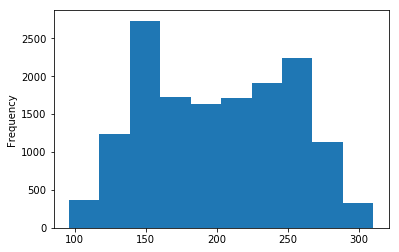

In [189]:
dataset['average_montly_hours'].plot(kind='hist')

In [190]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
dataset['average_montly_hours_scaled'] = mms.fit_transform(dataset['average_montly_hours'])

/Users/vaibhavsinh_vaghela/Anaconda/anaconda3/envs/ztdl/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [191]:
dataset.drop(['average_montly_hours'],axis=1,inplace=True)

In [192]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,average_montly_hours_scaled
0,0.38,0.53,2,3,0,1,0,sales,low,0.285047
1,0.80,0.86,5,6,0,1,0,sales,medium,0.775701
2,0.11,0.88,7,4,0,1,0,sales,medium,0.822430
3,0.72,0.87,5,5,0,1,0,sales,low,0.593458
4,0.37,0.52,2,3,0,1,0,sales,low,0.294393


In [193]:
dataset1 = pd.get_dummies(dataset['salary'])

In [195]:
dataset[['salary_low','salary_medium','salary_high']] = dataset1

In [197]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,average_montly_hours_scaled,salary_low,salary_medium,salary_high
0,0.38,0.53,2,3,0,1,0,sales,low,0.285047,0,1,0
1,0.80,0.86,5,6,0,1,0,sales,medium,0.775701,0,0,1
2,0.11,0.88,7,4,0,1,0,sales,medium,0.822430,0,0,1
3,0.72,0.87,5,5,0,1,0,sales,low,0.593458,0,1,0
4,0.37,0.52,2,3,0,1,0,sales,low,0.294393,0,1,0


In [198]:
dataset.drop('salary',axis=1, inplace=True)

In [204]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,sales,average_montly_hours_scaled,salary_low,salary_medium,salary_high
0,0.38,0.53,2,3,0,1,0,sales,0.285047,0,1,0
1,0.80,0.86,5,6,0,1,0,sales,0.775701,0,0,1
2,0.11,0.88,7,4,0,1,0,sales,0.822430,0,0,1
3,0.72,0.87,5,5,0,1,0,sales,0.593458,0,1,0
4,0.37,0.52,2,3,0,1,0,sales,0.294393,0,1,0


In [282]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD

In [283]:
model_v = Sequential()

In [284]:
model_v.add(Dense(64,input_shape=(10,)))
model_v.add(Activation('relu'))
model_v.add(Dense(1))
model_v.add(Activation('sigmoid'))

In [285]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
satisfaction_level             14999 non-null float64
last_evaluation                14999 non-null float64
number_project                 14999 non-null int64
time_spend_company             14999 non-null int64
Work_accident                  14999 non-null int64
left                           14999 non-null int64
promotion_last_5years          14999 non-null int64
sales                          14999 non-null object
average_montly_hours_scaled    14999 non-null float64
salary_low                     14999 non-null uint8
salary_medium                  14999 non-null uint8
salary_high                    14999 non-null uint8
dtypes: float64(3), int64(5), object(1), uint8(3)
memory usage: 1.1+ MB


In [286]:
X=dataset[['satisfaction_level','last_evaluation','time_spend_company','number_project',
           'Work_accident','promotion_last_5years',
          'average_montly_hours_scaled','salary_low',
           'salary_medium','salary_high']].values
X.shape

(14999, 10)

In [287]:
y=dataset['left'].values

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [290]:
model_v.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [291]:
model_v.fit(X_train,y_train,epochs=100)

Epoch 1/100
10049/10049 [==============================] - 1s - loss: 0.3261 - acc: 0.8517     
Epoch 2/100
10049/10049 [==============================] - 0s - loss: 0.2164 - acc: 0.9183     
Epoch 3/100
10049/10049 [==============================] - 1s - loss: 0.1941 - acc: 0.9335     
Epoch 4/100
10049/10049 [==============================] - 1s - loss: 0.1878 - acc: 0.9377     
Epoch 5/100
10049/10049 [==============================] - 1s - loss: 0.1749 - acc: 0.9449     
Epoch 6/100
10049/10049 [==============================] - 1s - loss: 0.1721 - acc: 0.9456     
Epoch 7/100
10049/10049 [==============================] - 1s - loss: 0.1643 - acc: 0.9502     
Epoch 8/100
10049/10049 [==============================] - 1s - loss: 0.1620 - acc: 0.9531     
Epoch 9/100
10049/10049 [==============================] - 1s - loss: 0.1619 - acc: 0.9504     
Epoch 10/100
10049/10049 [==============================] - 1s - loss: 0.1614 - acc: 0.9530     
Epoch 11/100
10049/10049 [=============

10049/10049 [==============================] - 1s - loss: 0.1176 - acc: 0.9650     
Epoch 86/100
10049/10049 [==============================] - 1s - loss: 0.1200 - acc: 0.9639     
Epoch 87/100
10049/10049 [==============================] - 1s - loss: 0.1157 - acc: 0.9652     
Epoch 88/100
10049/10049 [==============================] - 1s - loss: 0.1156 - acc: 0.9653     
Epoch 89/100
10049/10049 [==============================] - 1s - loss: 0.1172 - acc: 0.9653     
Epoch 90/100
10049/10049 [==============================] - 1s - loss: 0.1186 - acc: 0.9647     
Epoch 91/100
10049/10049 [==============================] - 1s - loss: 0.1189 - acc: 0.9646     
Epoch 92/100
10049/10049 [==============================] - 1s - loss: 0.1157 - acc: 0.9666     
Epoch 93/100
10049/10049 [==============================] - 1s - loss: 0.1161 - acc: 0.9662     
Epoch 94/100
10049/10049 [==============================] - 1s - loss: 0.1138 - acc: 0.9678     
Epoch 95/100
10049/10049 [=================

In [292]:
from sklearn.metrics import f1_score, r2_score, precision_score,recall_score

In [299]:
print (f1_score(y_test,model_v.predict_classes(X_test)))

4224/4950 [========================>.....] - ETA: 0s0.868016194332


In [300]:
print (f1_score(y_train,model_v.predict_classes(X_train)))

10049/10049 [==============================] - 0s     
0.885400313972


In [301]:
from sklearn.metrics import confusion_matrix, classification_report
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df


In [302]:
# check the confusion matrix, precision and recall
y_test_pred = model_v.predict_classes(X_test)
pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

4512/4950 [==========================>...] - ETA: 0s

,Predicted Stay,Predicted Leave
Stay,3552,246
Leave,80,1072


In [303]:
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.98      0.94      0.96      3798
          1       0.81      0.93      0.87      1152

avg / total       0.94      0.93      0.94      4950

